In [ ]:
import matplotlib.pyplot as plt
import numpy as np

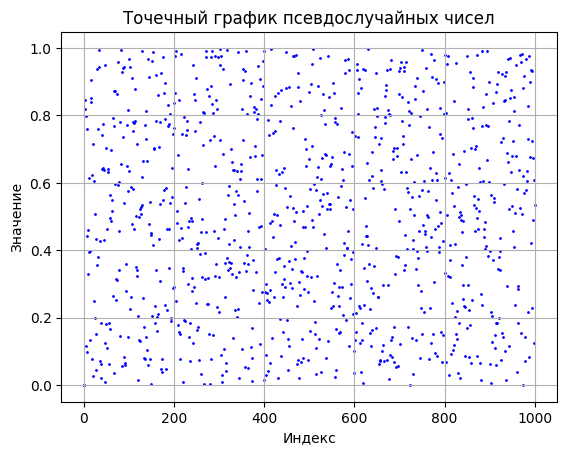

[2.842170943040401e-14, 6.536993234362853e-05, 0.845893854071619, 0.8202822208404541, 0.7995355129241943, 0.11496376991271973, 0.4434220790863037, 0.09720635414123535, 0.7605874538421631, 0.330486536026001, 0.46099257469177246, 0.3939058780670166, 0.6139733791351318, 0.13219094276428223, 0.3982408046722412, 0.9056932926177979, 0.8518807888031006, 0.8403894901275635, 0.62235426902771, 0.0778810977935791, 0.7164971828460693, 0.025394678115844727, 0.2505204677581787, 0.6057817935943604, 0.20001006126403809, 0.507519006729126, 0.14992690086364746, 0.4347078800201416, 0.044606924057006836, 0.3570749759674072, 0.9377610683441162, 0.7599716186523438, 0.37973785400390625, 0.9429550170898438, 0.9946060180664062, 0.42867279052734375, 0.07236480712890625, 0.06087493896484375, 0.01926422119140625, 0.18331146240234375, 0.7415542602539062, 0.6397323608398438, 0.6454849243164062, 0.7738876342773438, 0.6373062133789062, 0.42952728271484375, 0.12326812744140625, 0.9504013061523438, 0.00962066650390625,

In [ ]:
M = 10**8 + 1
p = 23
x0 = 2**(-45)
sluch = []
sluch.append(x0)

for i in range(1000):
    sluch.append(p*sluch[i]*M - int(p * sluch[i]*M))

plt.scatter(range(len(sluch)), sluch, color='blue', s=1)
plt.title('Точечный график псевдослучайных чисел')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.grid(True)
plt.show()
print(sluch)

In [ ]:
X = sum(sluch)/len(sluch)
print("Выборочное среднее: ", X)

Выборочное среднее:  0.5024904909803382


In [ ]:
D = 0
for i in range (len(sluch)):
  D += (sluch[i] - X)**2
D = D * 1/(len(sluch)-1)
print("Дисперсия: ", D)

Дисперсия:  0.08548306864060301



Частотная таблица:
[0.00, 0.10): 106, 1060.000
[0.10, 0.20): 99, 990.000
[0.20, 0.30): 92, 920.000
[0.30, 0.40): 96, 960.000
[0.40, 0.50): 105, 1050.000
[0.50, 0.60): 104, 1040.000
[0.60, 0.70): 97, 970.000
[0.70, 0.80): 92, 920.000
[0.80, 0.90): 101, 1010.000
[0.90, 1.00): 109, 1090.000


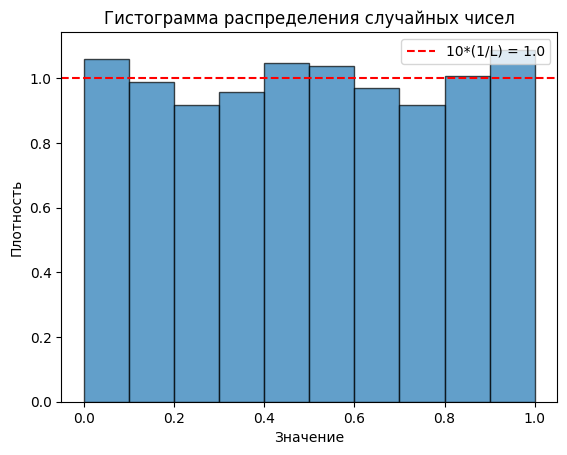

In [ ]:

# Количество интервалов
num_bins = 10

# Формируем гистограмму с нормализацией
counts, bin_edges = np.histogram(sluch, bins=num_bins, range=(0, 1))

# Ширина каждого интервала
bin_width = (bin_edges[1] - bin_edges[0])

# Нормализуем частоты, деля на ширину интервала
normalized_counts = counts / bin_width

# Формируем таблицу частот
frequency_table = {
    "Интервал": [f"[{bin_edges[i]:.2f}, {bin_edges[i+1]:.2f})" for i in range(num_bins)],
    "Частота": counts,
    "Нормированная частота": normalized_counts
}

# Выводим частотную таблицу
print("\nЧастотная таблица:")
for i in range(num_bins):
    print(f"{frequency_table['Интервал'][i]}: {frequency_table['Частота'][i]}, {frequency_table['Нормированная частота'][i]:.3f}")

# Построение гистограммы с нормированными высотами
plt.hist(sluch, bins=num_bins, range=(0, 1), edgecolor='black', alpha=0.7, density=True)
plt.title('Гистограмма распределения случайных чисел')
plt.xlabel('Значение')
plt.ylabel('Плотность')

# Рисуем пунктирную линию на уровне 1/L
L = num_bins
plt.axhline(y=10*(1/L), color='red', linestyle='--', label=f'10*(1/L) = {10*(1/L):.1f}')

# Добавляем легенду
plt.legend()

# Показываем график
plt.show()


Моделирование дискретной случайной величины

In [ ]:
x = [7, 16, 28, 33, 39, 46, 56]
P = [0.01, 0.05, 0.07, 0.1, 0.17, 0.25, 0.35]
p_values = [0, 0.01, 0.06, 0.13, 0.23, 0.4, 0.65, 1]

In [ ]:
intervals_dict = {}
for i in range(len(p_values) - 1):
    interval = (p_values[i], p_values[i+1])
    intervals_dict[interval] = x[i]

print(intervals_dict)

{(0, 0.01): 7, (0.01, 0.06): 16, (0.06, 0.13): 28, (0.13, 0.23): 33, (0.23, 0.4): 39, (0.4, 0.65): 46, (0.65, 1): 56}


In [ ]:
def find_interval(value, p_values):
    for i in range(len(p_values) - 1):
        if p_values[i] <= value < p_values[i+1]:
            return (p_values[i], p_values[i+1])
    return None  # Если значение не входит в диапазоны

intervals = []
# Пример использования
for j in range(len(sluch)):
  intervals.append(find_interval(sluch[j], p_values))

print(intervals)

[(0, 0.01), (0, 0.01), (0.65, 1), (0.65, 1), (0.65, 1), (0.06, 0.13), (0.4, 0.65), (0.06, 0.13), (0.65, 1), (0.23, 0.4), (0.4, 0.65), (0.23, 0.4), (0.4, 0.65), (0.13, 0.23), (0.23, 0.4), (0.65, 1), (0.65, 1), (0.65, 1), (0.4, 0.65), (0.06, 0.13), (0.65, 1), (0.01, 0.06), (0.23, 0.4), (0.4, 0.65), (0.13, 0.23), (0.4, 0.65), (0.13, 0.23), (0.4, 0.65), (0.01, 0.06), (0.23, 0.4), (0.65, 1), (0.65, 1), (0.23, 0.4), (0.65, 1), (0.65, 1), (0.4, 0.65), (0.06, 0.13), (0.06, 0.13), (0.01, 0.06), (0.13, 0.23), (0.65, 1), (0.4, 0.65), (0.4, 0.65), (0.65, 1), (0.4, 0.65), (0.4, 0.65), (0.06, 0.13), (0.65, 1), (0, 0.01), (0.13, 0.23), (0.65, 1), (0.4, 0.65), (0.06, 0.13), (0.4, 0.65), (0.4, 0.65), (0.06, 0.13), (0.13, 0.23), (0.4, 0.65), (0.13, 0.23), (0.4, 0.65), (0.4, 0.65), (0.65, 1), (0.4, 0.65), (0.4, 0.65), (0.23, 0.4), (0.65, 1), (0.01, 0.06), (0.65, 1), (0.65, 1), (0.4, 0.65), (0.65, 1), (0.23, 0.4), (0.23, 0.4), (0.65, 1), (0.23, 0.4), (0.4, 0.65), (0.65, 1), (0.23, 0.4), (0.4, 0.65), (0.4,

In [ ]:
X_sluch = []

for i in range (len(intervals)):
  X_sluch.append(intervals_dict[intervals[i]])

print("Случапйная величина X: ", X_sluch)

Случапйная величина X:  [7, 7, 56, 56, 56, 28, 46, 28, 56, 39, 46, 39, 46, 33, 39, 56, 56, 56, 46, 28, 56, 16, 39, 46, 33, 46, 33, 46, 16, 39, 56, 56, 39, 56, 56, 46, 28, 28, 16, 33, 56, 46, 46, 56, 46, 46, 28, 56, 7, 33, 56, 46, 28, 46, 46, 28, 33, 46, 33, 46, 46, 56, 46, 46, 39, 56, 16, 56, 56, 46, 56, 39, 39, 56, 39, 46, 56, 39, 46, 46, 33, 56, 56, 56, 16, 56, 56, 56, 56, 46, 28, 28, 16, 39, 39, 56, 46, 33, 46, 56, 56, 46, 33, 56, 39, 46, 46, 56, 56, 56, 46, 46, 56, 56, 56, 39, 46, 56, 39, 39, 33, 16, 46, 33, 33, 46, 46, 46, 46, 56, 46, 39, 56, 33, 28, 28, 56, 56, 33, 56, 28, 56, 16, 56, 56, 46, 28, 46, 46, 7, 46, 33, 56, 56, 46, 56, 56, 33, 39, 56, 56, 39, 33, 33, 56, 33, 46, 56, 56, 46, 39, 16, 56, 28, 16, 56, 46, 46, 56, 39, 56, 56, 16, 46, 33, 46, 56, 56, 56, 39, 46, 46, 56, 33, 33, 46, 46, 56, 39, 56, 39, 56, 56, 56, 39, 56, 46, 46, 56, 33, 33, 46, 56, 28, 33, 46, 56, 46, 56, 39, 39, 7, 33, 56, 33, 46, 56, 46, 56, 56, 46, 46, 39, 46, 33, 33, 28, 46, 46, 46, 39, 39, 56, 28, 39, 

Математическое ожидание и дисперсия

In [ ]:
Mat_ozh_nabl = sum(X_sluch)/len(X_sluch)
print("Наблюдаемое мат ожидание", Mat_ozh_nabl)

Mat_ozh = 0

for i in range (len(x)):
  Mat_ozh += x[i]*P[i]

print("Математическое ожидание рассчетное M[X] = ", Mat_ozh)

Наблюдаемое мат ожидание 43.892107892107894
Математическое ожидание рассчетное M[X] =  43.86


In [ ]:
Disp_nabl = 0
for i in range (len(X_sluch)):
  Disp_nabl += (X_sluch[i] - Mat_ozh_nabl)**2
Disp_nabl = Disp_nabl * 1/(len(X_sluch)-1)
print("Дисперсия наблюдаемая: ", Disp_nabl)

Disp = 0
for i in range (len(x)):
  Disp += P[i] * (x[i] - Mat_ozh)**2

print("Рассчетная дисперсия случайной величины X = ", Disp)

Дисперсия наблюдаемая:  134.55834765234712
Рассчетная дисперсия случайной величины X =  138.5404


In [ ]:
from collections import Counter

counter = Counter(X_sluch)

frequency_table = {key: counter.get(key, 0) for key in x}
print(counter)
print(frequency_table)

Counter({56: 342, 46: 266, 39: 161, 33: 101, 28: 79, 16: 40, 7: 12})
{7: 12, 16: 40, 28: 79, 33: 101, 39: 161, 46: 266, 56: 342}


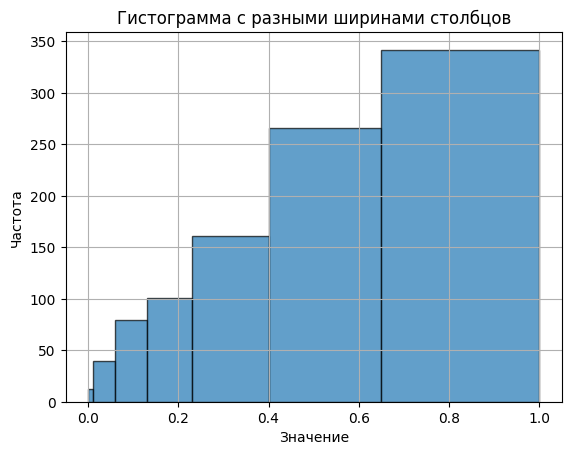

In [ ]:
counts, edges = np.histogram(sluch, bins=p_values)
centers = 0.5 * (edges[1:] + edges[:-1])

plt.bar(centers, counts, width=np.diff(edges), align='center', alpha=0.7, edgecolor='black')

plt.title('Гистограмма с разными ширинами столбцов')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

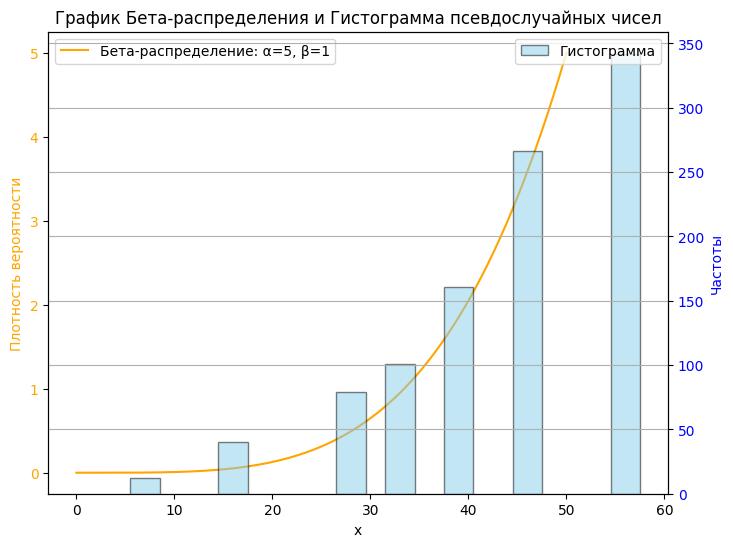

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

alpha = 5
beta_value = 1

x = np.linspace(0, 50, 1000)

scaled_x = x / 50

y = beta.pdf(scaled_x, alpha, beta_value)

data = frequency_table
x_data = list(data.keys())
y_data = list(data.values())

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(x, y, label=f'Бета-распределение: α={alpha}, β={beta_value}', color='orange')
ax1.set_xlabel('x')
ax1.set_ylabel('Плотность вероятности', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()

ax2.bar(x_data, y_data, width=3, color='skyblue', edgecolor='black', alpha=0.5, label='Гистограмма')

ax2.set_ylabel('Частоты', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('График Бета-распределения и Гистограмма псевдослучайных чисел')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Показать график
plt.grid(True)
plt.show()


3

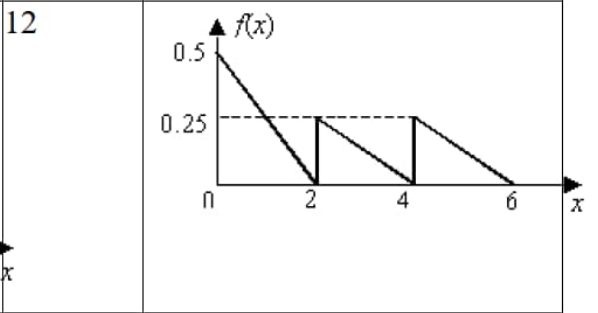

In [ ]:
#y = (-1/4)*(x-2)
#x = (0,2)


#x = 2
#y > 0
#y < 0,25

#y = (-1/8)*(x-4)
#x = (2,4)

#x = 4
#y > 0
#y < 0,25

#y = (-1/8)*(x-6)
#x = (4,6)

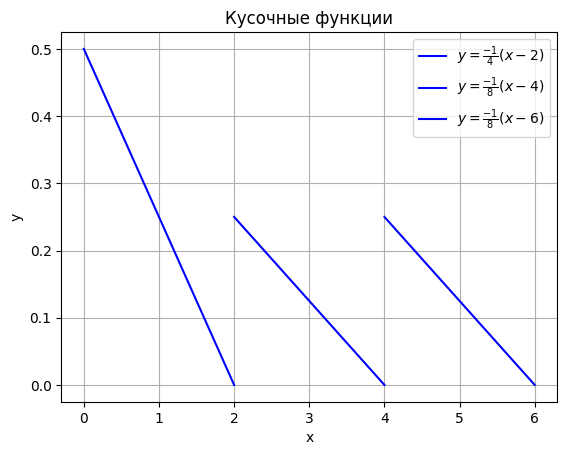

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем точки для каждого отрезка
x1 = np.linspace(0, 2, 100)
y1 = (-1/4) * (x1 - 2)

x2 = np.linspace(2, 4, 100)
y2 = (-1/8) * (x2 - 4)

x3 = np.linspace(4, 6, 100)
y3 = (-1/8) * (x3 - 6)

# Строим график
plt.plot(x1, y1, label=r"$y = \frac{-1}{4}(x-2)$", color='blue')
plt.plot(x2, y2, label=r"$y = \frac{-1}{8}(x-4)$", color='blue')
plt.plot(x3, y3, label=r"$y = \frac{-1}{8}(x-6)$", color='blue')

# Оформление
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кусочные функции')
plt.legend()
plt.grid(True)

# Показать график
plt.show()


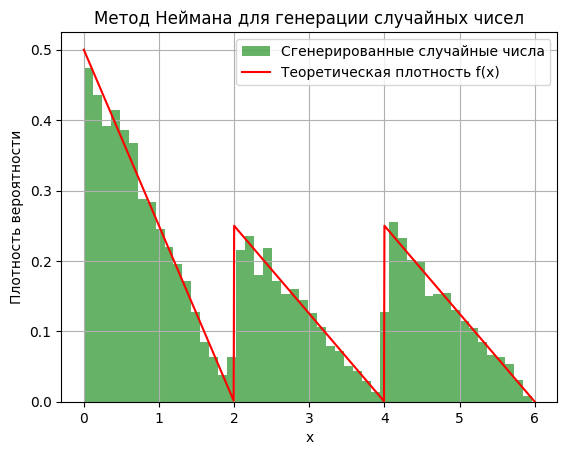

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    if 0 < x < 2:
        return (-1/4) * (x - 2)
    elif 2 < x < 4:
        return (-1/8) * (x - 4)
    elif 4 < x < 6:
        return (-1/8) * (x - 6)
    else:
        return 0

def generate_random_numbers_nyquist(n):
    M = 0.5
    random_numbers = []

    while len(random_numbers) < n:
        x_prime = np.random.uniform(0, 6)

        u = np.random.uniform(0, 1)

        if u < f(x_prime) / (M):
            random_numbers.append(x_prime)

    return np.array(random_numbers)

n = 10000
random_numbers = generate_random_numbers_nyquist(n)

plt.hist(random_numbers, bins=50, density=True, alpha=0.6, color='g', label='Сгенерированные случайные числа')

x = np.linspace(0, 6, 1000)
y = np.piecewise(x, [x < 2, (x >= 2) & (x < 4), (x >= 4) & (x < 6)],
                 [lambda x: (-1/4)*(x - 2),
                  lambda x: (-1/8)*(x - 4),
                  lambda x: (-1/8)*(x - 6)])

plt.plot(x, y, 'r-', label='Теоретическая плотность f(x)')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.title('Метод Неймана для генерации случайных чисел')
plt.grid(True)
plt.show()



In [ ]:
import sympy as sp

x = sp.symbols('x')

f1 = (-1/4)*(x - 2)
f2 = (-1/8)*(x - 4)
f3 = (-1/8)*(x - 6)

E_X = sp.integrate(x * f1, (x, 0, 2)) + sp.integrate(x * f2, (x, 2, 4)) + sp.integrate(x * f3, (x, 4, 6))

E_X2 = sp.integrate(x**2 * f1, (x, 0, 2)) + sp.integrate(x**2 * f2, (x, 2, 4)) + sp.integrate(x**2 * f3, (x, 4, 6))

E_X_value = E_X.evalf()

E_X2_value = E_X2.evalf()

variance = E_X2_value - E_X_value**2

E_X_value, variance


(2.16666666666667, 2.97222222222222)

4

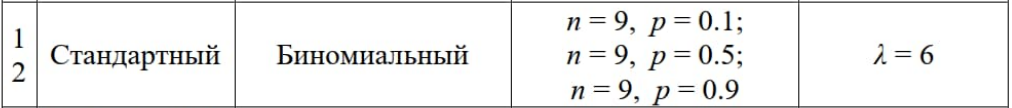

In [ ]:
import random
import scipy.stats as stats
import math

In [ ]:
#Входные параметры
p = 0.5
p_val = [1-p, p]

In [ ]:
#Функция генерации последовательнсти с равномерным законом распределения

def generate_uniform_random(a, b, n):

    return [random.uniform(a, b) for _ in range(n)]

In [ ]:
#Функция генерации последовательноси 0 и 1

def gener_posl(n):
    rand_numbers = generate_uniform_random(0, 1, n)
    res = []
    operations_count = 0

    for i in range(len(rand_numbers)):
        p_r = rand_numbers[i]
        operations_count += 1

        for j in range(len(p_val)):
            p_r = p_r - p_val[j]
            operations_count += 1

            if p_r < 0:
                res.append(j)
                break
            else:
                continue

    return res, operations_count


gen_40, ops_40 = gener_posl(40)
gen_100, ops_100 = gener_posl(100)

print("Последовательность длины 40:", gen_40)
print("Последовательность длины 100:", gen_100)
print("Количество операций для генерации последовательности длины 40:", ops_40)
print(f"Количество операций для генерации последовательности длины 100:", ops_100)


Последовательность длины 40: [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
Последовательность длины 100: [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
Количество операций для генерации последовательности длины 40: 100
Количество операций для генерации последовательности длины 100: 255


Задаем параметры

In [ ]:
#Генерация случайной величины Y

isp = 100000
len_isp = 9
Y = []
for i in range (isp):
  Y.append(gener_posl(len_isp)[0])

In [ ]:
#print(Y)

In [ ]:
#Подсчет количества 1 в каждой из сгенерированных последовательнстей
count_ones = [sequence.count(1) for sequence in Y]

print("Случайная величина Y с биномиальным законом распределения:", count_ones[:5])

Случайная величина Y с биномиальным законом распределения: [4, 4, 7, 2, 4]


In [ ]:
#Деление полученной с.в. на интервалы

def intervals_4(sluch_val):
  unique_znach = np.unique(sluch_val)

  min_int = min(unique_znach)
  max_int = max(unique_znach)
  len_int = (max_int - min_int)/len(unique_znach)

  intervals_4 = []
  start = 0

  for i in range (len(unique_znach)+1):
    start = start
    intervals_4.append(start)
    start += len_int
  return intervals_4

intervals_4 = intervals_4(count_ones)
print(intervals_4)

[0, 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.300000000000001, 7.200000000000001, 8.100000000000001, 9.000000000000002]


In [ ]:
#Определение какому интервалу соответствует каждое из значений случайной величины

def find_intervals(intervals, count_ones):
    res = []

    for i in range(len(count_ones)):
        start = count_ones[i]

        for j in range(1, len(intervals_4)):
            start_new = start - intervals_4[j]
            if start_new < 0:
                res.append(j-1)
                break
            else:
                continue

    return res

ress = find_intervals(intervals_4, count_ones)
#print(find_intervals(intervals_4, count_ones))

In [ ]:
#Номера всех интервалов(соответсвуют кличеству успехов в испытании)
count_intervals = np.unique(ress)
print(count_intervals)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#Подсчет частоты для каждого из значений
frequency = Counter(ress)

#Нормализация частоты(получение вероятностей)
normalized_frequency = {key: value / len(ress) for key, value in frequency.items()}
normalized_frequency = dict(sorted(normalized_frequency.items()))

In [ ]:
print(frequency)

Counter({4: 24763, 5: 24385, 3: 16470, 6: 16418, 7: 7143, 2: 6906, 8: 1758, 1: 1722, 0: 235, 9: 200})


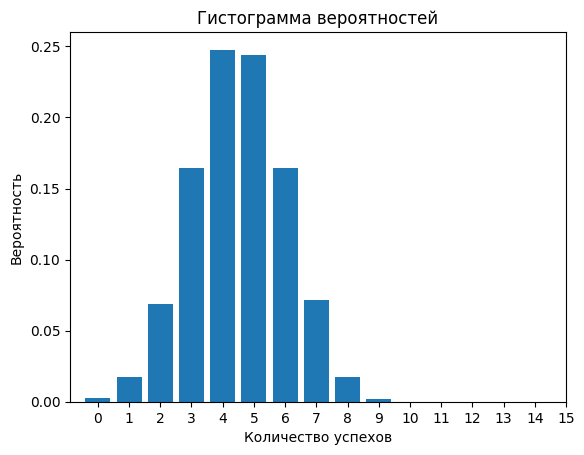

In [ ]:
#Построение гистограммы вероятностей
for num in range(1, 10):
    if num not in normalized_frequency:
        normalized_frequency[num] = 0

labels = list(normalized_frequency.keys())
counts = list(normalized_frequency.values())

all_labels = range(0, len(count_intervals)+6)

plt.bar(labels, counts)

plt.xticks(all_labels)

plt.title('Гистограмма вероятностей')
plt.xlabel('Количество успехов')
plt.ylabel('Вероятность')

plt.show()

In [ ]:
print(normalized_frequency)

{0: 0.00235, 1: 0.01722, 2: 0.06906, 3: 0.1647, 4: 0.24763, 5: 0.24385, 6: 0.16418, 7: 0.07143, 8: 0.01758, 9: 0.002}


In [ ]:
#Вычисление теоретических значений биномиального распределнеия для выбраных чисел

import math

def binomial_probability(n, k, p):
    binom_coeff = math.comb(n, k)

    return binom_coeff * (p ** k) * ((1 - p) ** (n - k))


probabilities = {k: binomial_probability(len_isp, k, p) for k in range(min(count_intervals), max(count_intervals)+1, 1)}

print(probabilities)

{0: 0.001953125, 1: 0.017578125, 2: 0.0703125, 3: 0.1640625, 4: 0.24609375, 5: 0.24609375, 6: 0.1640625, 7: 0.0703125, 8: 0.017578125, 9: 0.001953125}


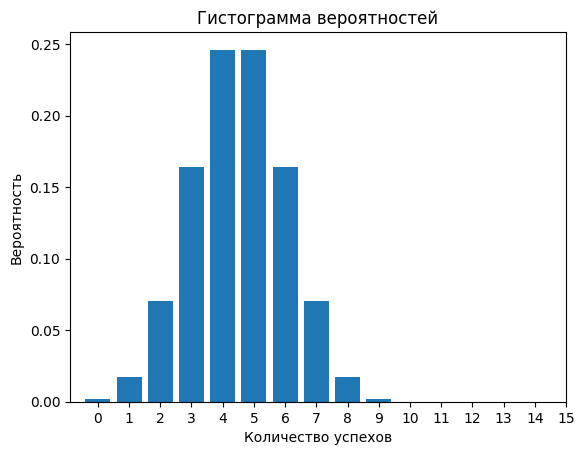

In [ ]:
#Построение гистограммы теоретических значений биномиального распределнеия для выбраных чисел

for num in range(1, 10):
    if num not in probabilities:
       probabilities[num] = 0

labels = list(probabilities.keys())
counts = list(probabilities.values())

all_labels = range(0, len(count_intervals)+6)

plt.bar(labels, counts)

plt.xticks(all_labels)

plt.title('Гистограмма вероятностей')
plt.xlabel('Количество успехов')
plt.ylabel('Вероятность')

plt.show()

---

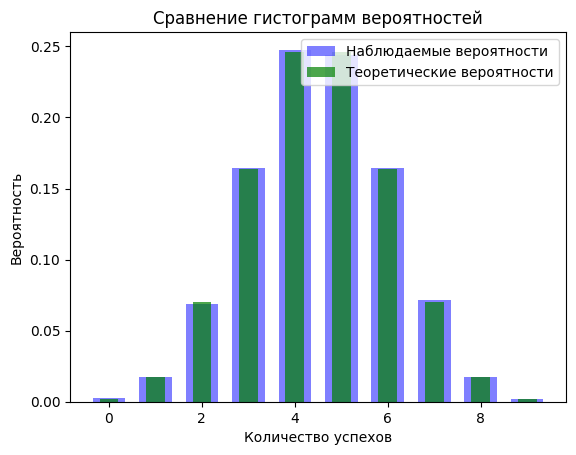

In [ ]:
import matplotlib.pyplot as plt

for num in range(1, 10):
    if num not in normalized_frequency:
        normalized_frequency[num] = 0
    if num not in probabilities:
        probabilities[num] = 0

labels = list(normalized_frequency.keys())
counts_normalized = list(normalized_frequency.values())
counts_probabilities = list(probabilities.values())

plt.bar(labels, counts_normalized, width=0.7, label='Наблюдаемые вероятности', color='blue', alpha=0.5)

plt.bar(labels, counts_probabilities, width=0.4, label='Теоретические вероятности', color='green', alpha=0.7)

plt.title('Сравнение гистограмм вероятностей')
plt.xlabel('Количество успехов')
plt.ylabel('Вероятность')

plt.legend()

plt.show()


In [ ]:
#Преобразование вероятностей в частоты

frequency_teor = {k: v * isp for k, v in probabilities.items()}
print(frequency_teor)

{0: 195.3125, 1: 1757.8125, 2: 7031.25, 3: 16406.25, 4: 24609.375, 5: 24609.375, 6: 16406.25, 7: 7031.25, 8: 1757.8125, 9: 195.3125}


In [ ]:
#Вычисление расчетной статистики хи квадрат

xi_2 = []
for i in range(min(count_intervals), max(count_intervals)+1, 1):
  xi2 = (frequency[i]-frequency_teor[i])**2/frequency_teor[i]
  xi_2.append(xi2)

xi_2 = sum(xi_2)
print(xi_2)

16.174709841269845


In [ ]:
#Параметры критического значения хи квадрат
a = 0.05
st_sv = len(count_intervals)

In [ ]:
#Вычисление критического хи квадрат

critical_value = stats.chi2.ppf(1 - a, st_sv)
print(f"Критическое значение хи-квадрат для p={a} и df={st_sv}: {critical_value}")


Критическое значение хи-квадрат для p=0.05 и df=10: 18.307038053275146


In [ ]:
if critical_value < xi_2:
  print('Отвергаем гипотезу Н0 о биномиальном распределении')
else:
  print('Принимаем гипотезу H0 о биномиальном распределении')

Принимаем гипотезу H0 о биномиальном распределении


Пуассоновский

In [ ]:
L = 6
len_p = 10000

In [ ]:
def poisson_probability(k, lambda_):
    return (lambda_**k * math.exp(-lambda_)) / math.factorial(k)

In [ ]:
def Q(L):
  Q = 0
  for k in range(L+1):
    Q += poisson_probability(k,L)

  return(Q)

In [ ]:
print(Q(6))

0.6063027824125913


In [ ]:
def alg_puassona(n, L):
  p_sluch = generate_uniform_random(0, 1, n)
  res = []
  for i in range(len(p_sluch)):
    p = p_sluch[i]-Q(L)
    count_if = 0
    count_else = 0

    if p > 0:
      j = 0
      while p > 0:

        p = p - poisson_probability(L+j+1, L)
        count_if += 1
        j += 1
    else:
      j = 0
      while p < 0 and j <= 6:
        p = p + poisson_probability(L-j, L)
        count_else += 1
        j += 1

    if count_if > 0:
        res.append(L+count_if)
    elif count_else > 0:
      res.append(L-(count_else-1))

  return res

In [ ]:
puas = alg_puassona(len_p, L)

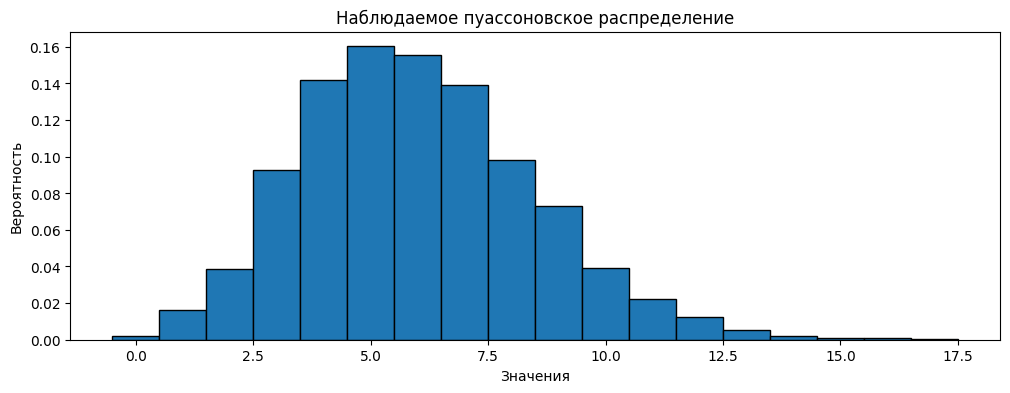

In [ ]:
import matplotlib.pyplot as plt

data = puas

plt.figure(figsize=(12, 4))

plt.hist(data, bins=range(min(data), max(data) + 2), edgecolor='black', align='left', density=True)

plt.title('Наблюдаемое пуассоновское распределение')
plt.xlabel('Значения')
plt.ylabel('Вероятность')

plt.show()


In [ ]:
frequency_puas = Counter(puas)

In [ ]:
frequency_puas = dict(sorted(frequency_puas.items()))
print(frequency_puas)

{0: 22, 1: 161, 2: 385, 3: 928, 4: 1418, 5: 1602, 6: 1553, 7: 1389, 8: 982, 9: 731, 10: 391, 11: 224, 12: 122, 13: 53, 14: 22, 15: 8, 16: 7, 17: 2}


In [ ]:
frequency_puas = {k: v / len_p for k, v in frequency_puas.items()}

In [ ]:
print(frequency_puas[10])

0.0391


In [ ]:
frequency_teor_p = {k: poisson_probability(k, L) for k in range(min(frequency_puas),max(frequency_puas)+1)}
print(frequency_teor_p)

{0: 0.0024787521766663585, 1: 0.014872513059998151, 2: 0.044617539179994455, 3: 0.08923507835998891, 4: 0.13385261753998337, 5: 0.16062314104798003, 6: 0.16062314104798003, 7: 0.13767697804112575, 8: 0.1032577335308443, 9: 0.06883848902056287, 10: 0.041303093412337726, 11: 0.022528960043093304, 12: 0.011264480021546652, 13: 0.0051989907791753776, 14: 0.0022281389053608763, 15: 0.0008912555621443505, 16: 0.0003342208358041314, 17: 0.00011796029498969344}


In [ ]:
xi_2_p = []

for i in range(min(frequency_puas), max(frequency_puas)+1):
    observed = frequency_puas.get(i, 0)
    expected = frequency_teor_p.get(i, 0)

    if expected != 0:
        xi2p = (observed - expected) ** 2 / expected
        xi_2_p.append(xi2p)

xi_2_p = sum(xi_2_p)
print(xi_2_p)

0.002950645312335867


In [ ]:
#Параметры критического значения хи квадрат
a = 0.05
st_sv = len(frequency_puas)

In [ ]:
#Вычисление критического хи квадрат

critical_value = stats.chi2.ppf(1 - a, st_sv)
print(f"Критическое значение хи-квадрат для p={a} и df={st_sv}: {critical_value}")


Критическое значение хи-квадрат для p=0.05 и df=18: 28.869299430392623


In [ ]:
if critical_value < xi_2_p:
  print('Отвергаем гипотезу Н0 о Пуассоновском распределении')
else:
  print('Принимаем гипотезу H0 о Пуассоновском распределении')

Принимаем гипотезу H0 о Пуассоновском распределении
